In [1]:
import os
import sys

sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
from sklearn.metrics import auc

In [4]:
cols_baard = [
    '#81C784',  # Stage 1  
    '#4CAF50',  # Stage 2
    '#388E3C'   # Stage 3
]
cols = [
    '#b166d0',  # magnet
    '#2196f3',  # rc
    '#F9A825',  # lid
    '#ff1744',  # fs
    '#4CAF50',  # baard
]

In [5]:
def draw_roc_curve(title, fprs, tprs, aucs):
    plt.figure(figsize=(3.6, 3.6))
    plt.xlim(0., 1.1)
    plt.ylim(0., 1.1)
    plt.plot(fprs[0], tprs[0], color=cols[0], label='Stage 1: ROC (AUC = %0.4f)' % aucs[0], linewidth=2.0)
    plt.plot(fprs[1], tprs[1], color=cols[1], label='Stage 2: ROC (AUC = %0.4f)' % aucs[1], linewidth=2.0)
    plt.plot(fprs[2], tprs[2], color=cols[2], label='Stage 3: ROC (AUC = %0.4f)' % aucs[2], linewidth=2.0)
    plt.legend(loc='lower right')
    # plt.title(title)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.savefig('{}.pdf'.format(title), format='pdf', dpi=400, bbox_inches='tight')

In [6]:
def get_elements(dfs):
    fprs = []
    tprs = []
    aucs = []
    for df in dfs:
        tpr = np.sort(df['tpr'].to_numpy())
        # tpr = df['tpr'].to_numpy()
        tprs.append(tpr)
        fpr = np.sort(df['fpr'].to_numpy())
        # fpr = df['fpr'].to_numpy()
        fprs.append(fpr)
        a = auc(fpr, tpr)
        aucs.append(a)
    return fprs, tprs, aucs

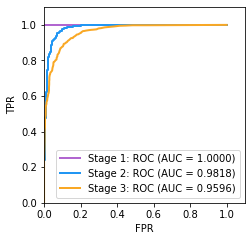

In [7]:
dfs = []
for i in range(1, 4):
    path = os.path.join('..', 'results', 'result_0', 'mnist_dnn', 'results', 'mnist_dnn_apgd_0.3_baard_s{}_roc.csv'.format(i))
    df = pd.read_csv(path)
    dfs.append(df)
    
fprs, tprs, aucs = get_elements(dfs)
draw_roc_curve('ROC Curve - MNIST APGD ε=0.3', fprs, tprs, aucs)

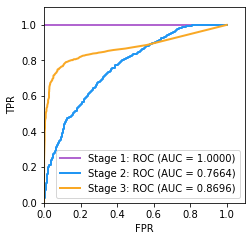

In [8]:
dfs = []
for i in range(1, 4):
    path = os.path.join('..', 'results', 'result_0', 'mnist_dnn', 'results', 'mnist_dnn_apgd2_2.0_baard_s{}_roc.csv'.format(i))
    df = pd.read_csv(path)
    dfs.append(df)
    
fprs, tprs, aucs = get_elements(dfs)
draw_roc_curve('ROC Curve - MNIST APGD L2 ε=2.0', fprs, tprs, aucs)

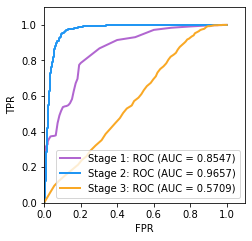

In [9]:
dfs = []
for i in range(1, 4):
    path = os.path.join('..', 'results', 'result_0', 'cifar10_resnet', 'results', 'cifar10_resnet_apgd_0.3_baard_s{}_roc.csv'.format(i))
    df = pd.read_csv(path)
    dfs.append(df)
    
fprs, tprs, aucs = get_elements(dfs)
draw_roc_curve('ROC Curve - CIFAR10 APGD ε=0.3', fprs, tprs, aucs)

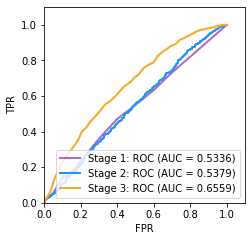

In [10]:
dfs = []
for i in range(1, 4):
    path = os.path.join('..', 'results', 'result_0', 'cifar10_resnet', 'results', 'cifar10_resnet_apgd2_2.0_baard_s{}_roc.csv'.format(i))
    df = pd.read_csv(path)
    dfs.append(df)
    
fprs, tprs, aucs = get_elements(dfs)
draw_roc_curve('ROC Curve - CIFAR10 APGD L2 ε=2.0', fprs, tprs, aucs)

In [11]:
# data = 'banknote'
# model = 'dnn'
# att = 'apgd'
# eps = '0.3'
# dfs = []
# for i in range(1, 4):
#     path = os.path.join('..', 'results', 'result_0', '{}_{}'.format(data, model), 'results', '{}_{}_{}_{}_baard_s{}_roc.csv'.format(data, model, att, eps, i))
#     df = pd.read_csv(path)
#     dfs.append(df)
    
# fprs, tprs, aucs = get_elements(dfs)
# draw_roc_curve('ROC Curve - Banknote apgd 0.3', fprs, tprs, aucs)

In [12]:
# data = 'banknote'
# model = 'dnn'
# att = 'apgd2'
# eps = '2.0'
# dfs = []
# for i in range(1, 4):
#     path = os.path.join('..', 'results', 'result_0', '{}_{}'.format(data, model), 'results', '{}_{}_{}_{}_baard_s{}_roc.csv'.format(data, model, att, eps, i))
#     df = pd.read_csv(path)
#     dfs.append(df)
    
# fprs, tprs, aucs = get_elements(dfs)
# draw_roc_curve('ROC Curve - Banknote apgd2 2.0', fprs, tprs, aucs)

In [13]:
# data = 'breastcancer'
# model = 'dnn'
# att = 'apgd'
# eps = '0.3'
# dfs = []
# for i in range(1, 4):
#     path = os.path.join('..', 'results', 'result_0', '{}_{}'.format(data, model), 'results', '{}_{}_{}_{}_baard_s{}_roc.csv'.format(data, model, att, eps, i))
#     df = pd.read_csv(path)
#     dfs.append(df)
    
# fprs, tprs, aucs = get_elements(dfs)
# draw_roc_curve('ROC Curve - BreastCancer apgd 0.3', fprs, tprs, aucs)

In [14]:
# data = 'breastcancer'
# model = 'dnn'
# att = 'apgd2'
# eps = '2.0'
# dfs = []
# for i in range(1, 4):
#     path = os.path.join('..', 'results', 'result_0', '{}_{}'.format(data, model), 'results', '{}_{}_{}_{}_baard_s{}_roc.csv'.format(data, model, att, eps, i))
#     df = pd.read_csv(path)
#     dfs.append(df)
    
# fprs, tprs, aucs = get_elements(dfs)
# draw_roc_curve('ROC Curve - BreastCancer apgd2 2.0', fprs, tprs, aucs)

In [15]:
# data = 'htru2'
# model = 'dnn'
# att = 'apgd'
# eps = '0.3'
# dfs = []
# for i in range(1, 4):
#     path = os.path.join('..', 'results', 'result_0', '{}_{}'.format(data, model), 'results', '{}_{}_{}_{}_baard_s{}_roc.csv'.format(data, model, att, eps, i))
#     df = pd.read_csv(path)
#     dfs.append(df)
    
# fprs, tprs, aucs = get_elements(dfs)
# draw_roc_curve('ROC Curve - HTRU2 apgd 0.3', fprs, tprs, aucs)

In [16]:
# data = 'htru2'
# model = 'dnn'
# att = 'apgd2'
# eps = '2.0'
# dfs = []
# for i in range(1, 4):
#     path = os.path.join('..', 'results', 'result_0', '{}_{}'.format(data, model), 'results', '{}_{}_{}_{}_baard_s{}_roc.csv'.format(data, model, att, eps, i))
#     df = pd.read_csv(path)
#     dfs.append(df)
    
# fprs, tprs, aucs = get_elements(dfs)
# draw_roc_curve('ROC Curve - HTRU2 apgd2 2.0', fprs, tprs, aucs)